In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [61]:
c = pd.read_csv("cases_state.csv")

In [62]:
c.tail()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
15755,2022-10-05,Selangor,581,0,544,5042,0,33,2,98,...,9,30,21,163,181,85,48,22,13,9
15756,2022-10-05,Terengganu,26,4,20,332,0,3,0,6,...,0,0,1,6,10,1,3,2,0,3
15757,2022-10-05,W.P. Kuala Lumpur,388,0,313,3744,0,17,0,50,...,8,5,19,121,124,65,28,10,4,4
15758,2022-10-05,W.P. Labuan,4,0,0,23,0,1,0,2,...,1,0,1,0,1,1,0,0,0,0
15759,2022-10-05,W.P. Putrajaya,20,0,31,336,0,1,0,7,...,1,3,1,2,7,5,1,0,0,0


In [63]:
c['state'] = c['state'].replace(['W.P. Putrajaya','W.P. Kuala Lumpur','W.P. Labuan', 'Pulau Pinang'], ['Putrajaya','Kuala Lumpur', 'Labuan', 'Penang'])


In [64]:
c.loc[c.state == "Johor", "lon"] = 103.413
c.loc[c.state == "Johor", "lat"] = 2.041
c.loc[c.state == "Kedah", "lon"] = 100.925
c.loc[c.state == "Kedah", "lat"] = 6.020
c.loc[c.state == "Kelantan", "lon"] = 102.032
c.loc[c.state == "Kelantan", "lat"] = 5.316
c.loc[c.state == "Melaka", "lon"] = 102.304
c.loc[c.state == "Melaka", "lat"] = 2.323
c.loc[c.state == "Negeri Sembilan", "lon"] = 102.233
c.loc[c.state == "Negeri Sembilan", "lat"] = 2.796
c.loc[c.state == "Pahang", "lon"] = 102.506
c.loc[c.state == "Pahang", "lat"] = 3.774
c.loc[c.state == "Perak", "lon"] = 100.984
c.loc[c.state == "Perak", "lat"] = 4.691
# c.loc[c.state == "Perlis", "lon"] = 100.218
# c.loc[c.state == "Perlis", "lat"] = 6.495
c.loc[c.state == "Perlis", "lon"] = 101.074
c.loc[c.state == "Perlis", "lat"] = 2.102
# c.loc[c.state == "Penang", "lon"] = 100.278
# c.loc[c.state == "Penang", "lat"] = 5.387
c.loc[c.state == "Penang", "lon"] = 101.074
c.loc[c.state == "Penang", "lat"] = 2.102
c.loc[c.state == "Sabah", "lon"] = 114.166
c.loc[c.state == "Sabah", "lat"] = 5.326
c.loc[c.state == "Sarawak", "lon"] = 110.175
c.loc[c.state == "Sarawak", "lat"] = 2.393
c.loc[c.state == "Selangor", "lon"] = 101.336
c.loc[c.state == "Selangor", "lat"] = 3.502
c.loc[c.state == "Terengganu", "lon"] = 103.020
c.loc[c.state == "Terengganu", "lat"] = 5.024
# c.loc[c.state == "Kuala Lumpur", "lon"] = 101.699 #this 2 is the correct one but move it away to not block putrajaya
# c.loc[c.state == "Kuala Lumpur", "lat"] = 3.139 
c.loc[c.state == "Kuala Lumpur", "lon"] = 101.610
c.loc[c.state == "Kuala Lumpur", "lat"] = 1.379
c.loc[c.state == "Putrajaya", "lon"] = 101.7023
c.loc[c.state == "Putrajaya", "lat"] = 2.9449
c.loc[c.state == "Labuan", "lon"] = 112.390
c.loc[c.state == "Labuan", "lat"] = 5.327

In [65]:
c['datetime'] = pd.to_datetime(c['date'])

In [66]:
c['day'] = c['datetime'].dt.day
c['month'] = c['datetime'].dt.month
c['year'] = c['datetime'].dt.year

In [67]:
p = pd.read_csv("population.csv")
p.tail()

,state,pop
11,Selangor,6555100
12,Terengganu,1275200
13,W.P. Kuala Lumpur,1746600
14,W.P. Labuan,100100
15,W.P. Putrajaya,116100


In [68]:
p['state'] = p['state'].replace(['W.P. Putrajaya','W.P. Kuala Lumpur','W.P. Labuan', 'Pulau Pinang'], ['Putrajaya','Kuala Lumpur', 'Labuan', 'Penang'])


In [69]:
cp = c.set_index('state').join(p.set_index('state'))
cp = cp.reset_index()

In [70]:
cp.to_csv("../cleaned_cases_state.csv", index=False)

In [17]:
cp['ac_per_100k'] = cp["cases_active"]/cp["pop"] * 100000

array([[<AxesSubplot: title={'center': 'ac_per_100k'}>]], dtype=object)

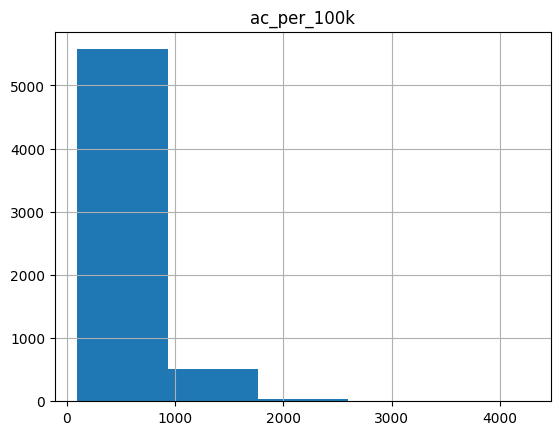

In [49]:
table = cp[cp["ac_per_100k"] > 100 ]
table.hist(column='ac_per_100k', bins=5)

In [25]:
cp

,state,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_70_79,cases_80,lon,lat,datetime,day,month,year,pop,ac_per_100k
0,Johor,2020-01-25,4,4,0,4,0,4,0,0,...,0,0,103.413,2.041,2020-01-25,25,1,2020,3794200,0.105424
1,Johor,2020-01-26,0,0,0,4,0,0,0,0,...,0,0,103.413,2.041,2020-01-26,26,1,2020,3794200,0.105424
2,Johor,2020-01-27,0,0,0,4,0,0,0,0,...,0,0,103.413,2.041,2020-01-27,27,1,2020,3794200,0.105424
3,Johor,2020-01-28,0,0,0,4,0,0,0,0,...,0,0,103.413,2.041,2020-01-28,28,1,2020,3794200,0.105424
4,Johor,2020-01-29,2,2,0,6,0,2,0,0,...,0,0,103.413,2.041,2020-01-29,29,1,2020,3794200,0.158136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Terengganu,2022-10-01,10,0,34,351,0,2,0,4,...,1,1,103.020,5.024,2022-10-01,1,10,2022,1275200,27.525094
15756,Terengganu,2022-10-02,12,0,31,331,0,4,0,7,...,1,0,103.020,5.024,2022-10-02,2,10,2022,1275200,25.956713
15757,Terengganu,2022-10-03,16,0,21,326,0,1,0,9,...,1,0,103.020,5.024,2022-10-03,3,10,2022,1275200,25.564617
15758,Terengganu,2022-10-04,18,0,18,326,0,6,0,5,...,0,2,103.020,5.024,2022-10-04,4,10,2022,1275200,25.564617
